In [187]:
import pandas as pd
import os
import numpy as np

In [188]:
path=r"D:\Code for tutorials\Machine Learning\datasets\titanic\train.csv"
path=os.path.join(path)
df=pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [189]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
### drop unwanted Data
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [191]:
na_count=df['Age'].isna().sum()
no_na_count=df['Age'].notna().sum()
len(df)
print(f"Total number of missing values in Age column is {df['Age'].isna().sum()}")
print(f"Total number of non-missing values in Age column is {df['Age'].notna().sum()}")
if na_count + no_na_count == len(df):
    print("All the values are accounted for")
else:
    print("Some values are missing")
    
df['Age'].fillna(df['Age'].mean(),inplace=True)

na_count=df['Age'].isna().sum()
print(f"Total number of missing values after filling missing counts in Age column is {df['Age'].isna().sum()}")

Total number of missing values in Age column is 177
Total number of non-missing values in Age column is 714
All the values are accounted for
Total number of missing values after filling missing counts in Age column is 0


C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_10040\3740879274.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


### Note

.mode() returns the most frequent value(s) (i.e., the most common value) in that column.

In [192]:
max_repeated = df['Embarked'].mode()[0]
least_repeated = df['Embarked'].value_counts().idxmin()
print(f"The  most repeated value is {max_repeated} and the least repeated value is {least_repeated}")
missing_values = df['Embarked'].isnull()
total_missing = len(missing_values)
print(f"the total missing values are {total_missing}")
fill_80 = int(total_missing * 0.8)
fill_20 = total_missing - fill_80
print(f"the 80% of the missing values are {fill_80} and the 20% of the missing values are {fill_20}")
shuffled_index = np.random.permutation(df.index) 
print(f"df.index is {df.index}")
print(f"the shuffled index is {shuffled_index}")
df.loc[shuffled_index[:fill_80], 'Embarked'] = max_repeated
df.loc[shuffled_index[fill_80:], 'Embarked'] = least_repeated
print(f"number of missing values after filling the missing values are {df['Embarked'].isnull().sum()}")
df

The  most repeated value is S and the least repeated value is Q
the total missing values are 891
the 80% of the missing values are 712 and the 20% of the missing values are 179
df.index is RangeIndex(start=0, stop=891, step=1)
the shuffled index is [157 154 728  42 211  91 766 113 691 873 166 137   5 399 616 266 723 453
 418 535 839 107 230 564 261  22 273 487 287  89 867 443 594 259 480 689
 240 238 761 337 785 631 136 813 298 792 660 718 841 455  77 173 876 297
   0 466 499 602 109  85 844 888 858 134 256 701 231 648 468 471 587 148
 222 654 280  19 373 307 252 687 601 579 598 836 200 597 114 340  41 117
 541 262 672 685 207 550 658 615 130 748 612 291 147 245 415 693  70  23
 752 772  35 786 562 305 563 559 115 532  53 735 212 529 591 751 589 302
 561 568 268 304 310 433 486 696 436 808 123 771 686 848 753 361 260 274
 452 857 420 488 523 333 577 673 210 170 345 881 729 105 635 807 270  60
 357 353 494  48 860 116 817 668 690 666 450 444  86 437  72 199 802 122
 275 731 465 542  14 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,Q
4,0,3,male,35.000000,0,0,8.0500,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,S


### Encodeing the categorical features

In [193]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [194]:
df =  pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,True
1,1,1,1,38.000000,1,0,71.2833,True
2,1,3,1,26.000000,0,0,7.9250,True
3,1,1,1,35.000000,1,0,53.1000,False
4,0,3,0,35.000000,0,0,8.0500,False
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,True
887,1,1,1,19.000000,0,0,30.0000,True
888,0,3,1,29.699118,1,2,23.4500,True
889,1,1,0,26.000000,0,0,30.0000,True


### Feature Scaling

In [195]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
print(f"Before scaling: {df[['Age','Fare']].head()}")
df[['Age','Fare']] = scalar.fit_transform(df[['Age','Fare']])
print(f"After scaling: {df[['Age','Fare']].head()}")

Before scaling:     Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
After scaling:         Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


### Separate the feature and target variables

In [196]:
X=df.drop('Survived',axis=1)
y=df['Survived']

### Seprate the data into training and testing sets

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X,y

X_train shape: (712, 7)
y_train shape: (712,)
X_test shape: (179, 7)
y_test shape: (179,)


(     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_S
 0         3    0 -0.592481      1      0 -0.502445        True
 1         1    1  0.638789      1      0  0.786845        True
 2         3    1 -0.284663      0      0 -0.488854        True
 3         1    1  0.407926      1      0  0.420730       False
 4         3    0  0.407926      0      0 -0.486337       False
 ..      ...  ...       ...    ...    ...       ...         ...
 886       2    0 -0.207709      0      0 -0.386671        True
 887       1    1 -0.823344      0      0 -0.044381        True
 888       3    1  0.000000      1      2 -0.176263        True
 889       1    0 -0.284663      0      0 -0.044381        True
 890       3    0  0.177063      0      0 -0.492378        True
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [198]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

model

LogisticRegression()

### Evalluate the model

In [199]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

### Checking The Accuracy

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587

Confusion Matrix:
 [[92 13]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Visualize the Accuracy of the model

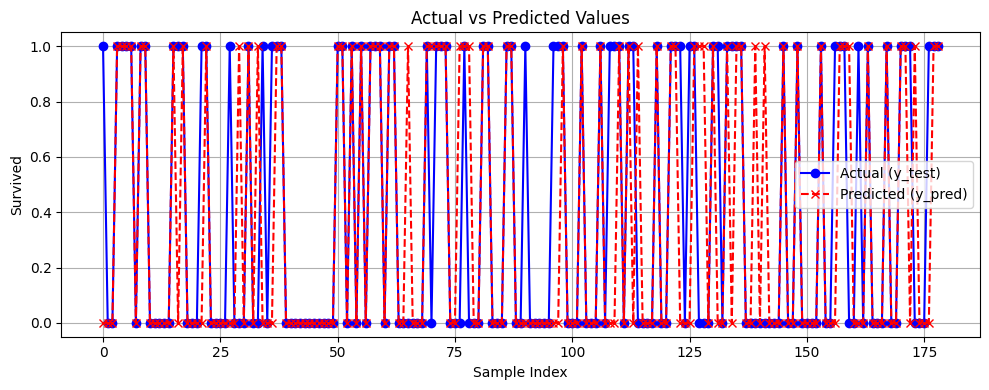

In [201]:
import matplotlib.pyplot as plt

# Reset index to align both series for plotting
y_test_reset = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(y_test_reset, label='Actual (y_test)', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_series, label='Predicted (y_pred)', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Survived')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


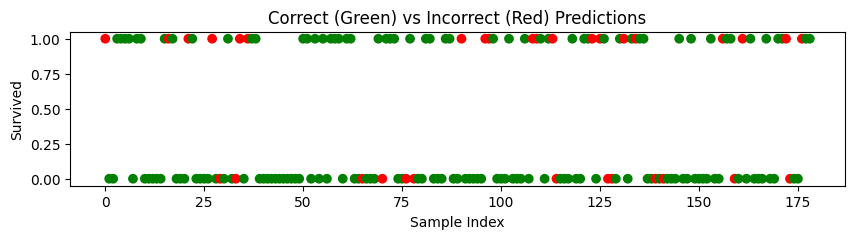

In [202]:
correct = (y_test.values == y_pred)
colors = ['green' if c else 'red' for c in correct]

plt.figure(figsize=(10, 2))
plt.scatter(range(len(y_test)), y_test, c=colors, label='Actual', marker='o')
plt.title('Correct (Green) vs Incorrect (Red) Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Survived')
plt.show()
